# Plotting gridded data in matplotlib

In [1]:
# initialization
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

Up to this point we've only plotted a variable's dependence on one dimension (e.g., temperature as function of time; salinity as function of depth). However, as we have seen, many variables can depend on more than one dimensions, and it can be useful to visualize dependency on multiple dimensions at once.

In particular, let's consider the case where a variable is dependent on two dimensions. Numerically, such data is represented by a 2-dimensional array. Graphically, we may present such data as a false-color plot or a contour plot (we're not going to discuss perspective 3-dimensional plots, since such plots tend to provide less quantitative information)

For our examples, we will use a coarsened slice of the [Global Ocean Physics Analysis and Forecast](https://data.marine.copernicus.eu/product/GLOBAL_ANALYSISFORECAST_PHY_001_024/services) data for the month of June, 2024. A copy of the dataset we used can be downloaded [here](https://github.com/OCEAN-215-2025/preclass/tree/main/week_07/data/global_ocean_physical_202406.nc):

In [4]:
dset = xr.open_dataset("data/global_ocean_physical_202406.nc")
display(dset)

<xarray.Dataset> Size: 26MB
Dimensions:      (time: 1, depth: 50, longitude: 121, latitude: 269)
Coordinates:
  * time         (time) datetime64[ns] 8B 2024-06-16
  * depth        (depth) float32 200B 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * longitude    (longitude) float32 484B -180.0 -179.5 -179.0 ... -120.5 -120.0
  * latitude     (latitude) float64 2kB -67.0 -66.5 -66.0 ... 66.0 66.5 67.0
Data variables:
    temperature  (time, depth, latitude, longitude) float64 13MB ...
    salinity     (time, depth, latitude, longitude) float64 13MB ...
Attributes: (12/13)
    title:                         Monthly mean fields for product GLOBAL_ANA...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    ...                            ...
    Conventions:                   CF-1.6
    area:                          GLOBAL
    product:                       GLOBAL_ANALYSISFORECAST_PHY_001_024
    source:                        MERCATOR GLO12
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...

## Input arguments for plotting 2D gridded data

The 3 plotting methods we introduce below all expect an input of the form `X`, `Y`, `Z`, where `X` and `Y` are 1-dimensional array representing the horizontal (x-) and vertical (y-) coordinates, respectively, while `Z` is a 2-dimensional matrix. The size of `X` must agree with the column size of `Z`, and `Y` must agree with the row size of `Z`. In a picture:

![Alignment of data for 2D plot](img/matrix_data_alignment.png)

For our example dataset, we will take latitude as our horizontal coordinate and depth as our vertical coordinate. Thus, the variables that corresponds to `X` and `Y` are:

In [39]:
lat = dset.coords["latitude"].values
depths = dset.coords["depth"].values

For our 2D data `Z`, we will average over longitude and extract the only time component. We will consider both salinity and temperature. So we define two arrays here:

In [41]:
temp = dset["temperature"].mean("longitude").squeeze().values
sal = dset["salinity"].mean("longitude").squeeze().values

Note that we use `.squeeze()` to eliminate dimensions of the internal numpy array that corresponds to an DataArray dimension of length 1. We can check that both `temp` and `sal` are 2-dimensional numpy array and that their shape align with that of `lat` and `depths`

In [43]:
print("shape of `lat` = " + str(lat.shape))
print("shape of `depths` = " + str(depths.shape))
print("shape of `temp` = " + str(temp.shape))
print("shape of `sal` = " + str(sal.shape))

shape of `lat` = (269,)
shape of `depths` = (50,)
shape of `temp` = (50, 269)
shape of `sal` = (50, 269)


## False-color plot via `.pcolormesh()`

We can make a false color plot using `.pcolormesh()` method of the Axes instance. Example:

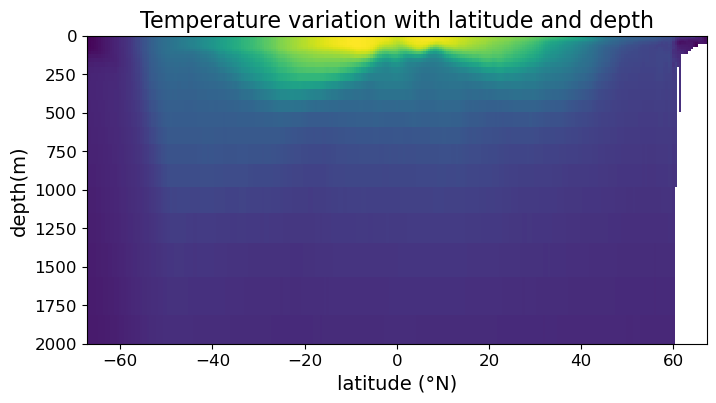

In [54]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot()

# making false color plot
ax.pcolormesh(lat, depths, temp)

ax.set_xlabel("latitude (°N)", fontsize=14)
ax.set_ylabel("depth (m)", fontsize=14)
ax.set_title("Temperature variation with latitude and depth", fontsize=16)
ax.tick_params(labelsize=12)

ax.set_ylim(2000, 0)

plt.show(fig)

Note that we focus ourselves to depths in the range (0 m, 2000 m), since that's the region where most variation in temperature and salinity can be found.

While we can read off latitude and depth quantitatively in the above plot, we can't read off the temperature value without some kind of color guide. To generate the color guide, we need to *assign* the result of `.pcolormesh()` *to a variable* and use it to construct a color bar display. Concretely, this is how we need to change the example:

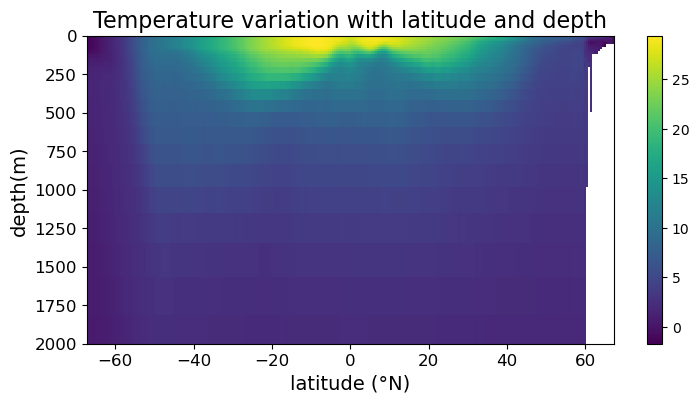

In [65]:
fig = plt.figure(figsize=(8.5, 4))
ax = fig.add_subplot()

#### MODIFICATION STARTS HERE

# assign output of .pcolormesh() to variable
im = ax.pcolormesh(lat, depths, temp)

# making color bar
fig.colorbar(im)

#### MODIFICATION ENDS HERE

ax.set_xlabel("latitude (°N)", fontsize=14)
ax.set_ylabel("depth (m)", fontsize=14)
ax.set_title("Temperature variation with latitude and depth", fontsize=16)
ax.tick_params(labelsize=12)

ax.set_ylim(2000, 0)

plt.show(fig)

Note that we now have a color bar but it is unlabeled. To update its title and settings, we assign the colorbar to a variable and use its methods to modify its appearance:

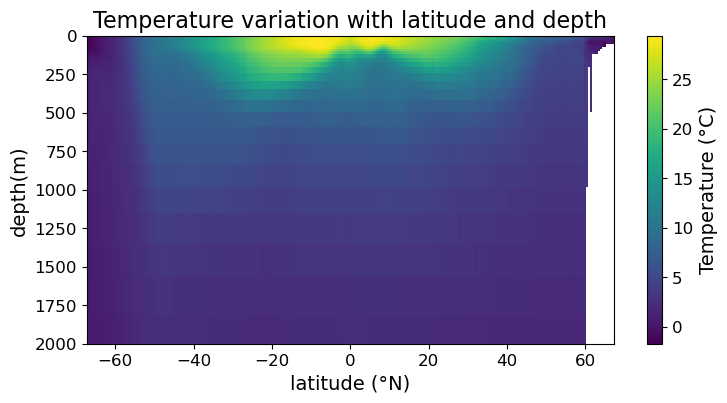

In [66]:
fig = plt.figure(figsize=(8.5, 4))
ax = fig.add_subplot()

im = ax.pcolormesh(lat, depths, temp)
cb = fig.colorbar(im)

#### MODIFICATION STARTS HERE

# customize appearance of the color bar
cb.set_label("Temperature (°C)", fontsize=14)
cb.ax.tick_params(labelsize=12)

#### MODIFICATION ENDS HERE

ax.set_xlabel("latitude (°N)", fontsize=14)
ax.set_ylabel("depth (m)", fontsize=14)
ax.set_title("Temperature variation with latitude and depth", fontsize=16)
ax.tick_params(labelsize=12)

ax.set_ylim(2000, 0)

plt.show(fig)

Sometimes you want to set the range of the color bar different from the span of data. We can do so using the `vmin` and `vmax` arguments of `.pcolormesh()`:

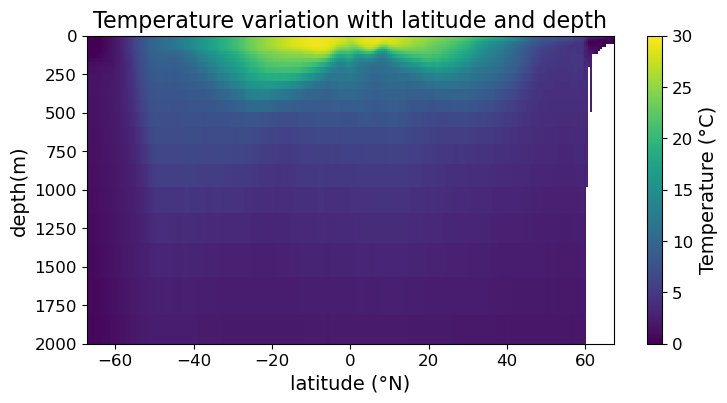

In [68]:
fig = plt.figure(figsize=(8.5, 4))
ax = fig.add_subplot()

#### MODIFICATION STARTS HERE

# setting max and min of color scale
im = ax.pcolormesh(lat, depths, temp, vmin = 0, vmax=30)

#### MODIFICATION ENDS HERE

cb = fig.colorbar(im)

cb.set_label("Temperature (°C)", fontsize=14)
cb.ax.tick_params(labelsize=12)

ax.set_xlabel("latitude (°N)", fontsize=14)
ax.set_ylabel("depth (m)", fontsize=14)
ax.set_title("Temperature variation with latitude and depth", fontsize=16)
ax.tick_params(labelsize=12)

ax.set_ylim(2000, 0)

plt.show(fig)

Finally, there may be occasions where you can get more information out from the figure if the color is plotted in log scale. 

As an example, consider the absolute value of the difference between salinity and its average over the region:

In [73]:
sal_diff_xr = np.fabs((dset["salinity"].mean("longitude") - dset["salinity"].mean()))
sal_diff = sal_diff_xr.squeeze().values

Plotting on the linear color scale we get:

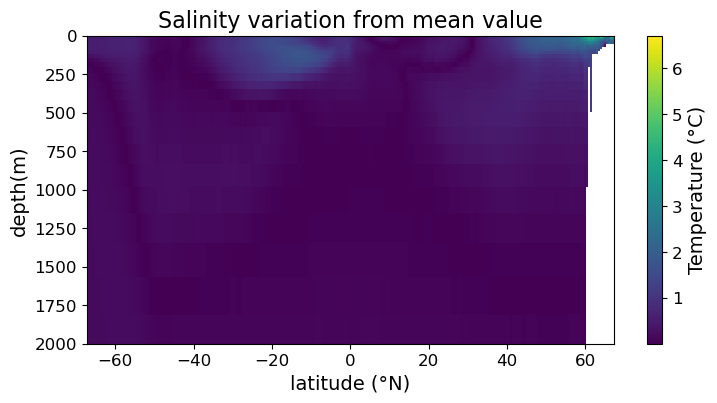

In [79]:
fig = plt.figure(figsize=(8.5, 4))
ax = fig.add_subplot()

im = ax.pcolormesh(lat, depths, sal_diff)
cb = fig.colorbar(im)

cb.set_label("Salinity", fontsize=14)
cb.ax.tick_params(labelsize=12)

ax.set_xlabel("latitude (°N)", fontsize=14)
ax.set_ylabel("depth (m)", fontsize=14)
ax.set_title("Absolute salinity variation from mean value", fontsize=16)
ax.tick_params(labelsize=12)

ax.set_ylim(2000, 0)

plt.show(fig)

To plot in log scale we need the `LogNorm()` function from the `matplotlib.color` submodule, so we import it below:

In [30]:
import matplotlib.colors as colors

Now we can plot in the log color scale:

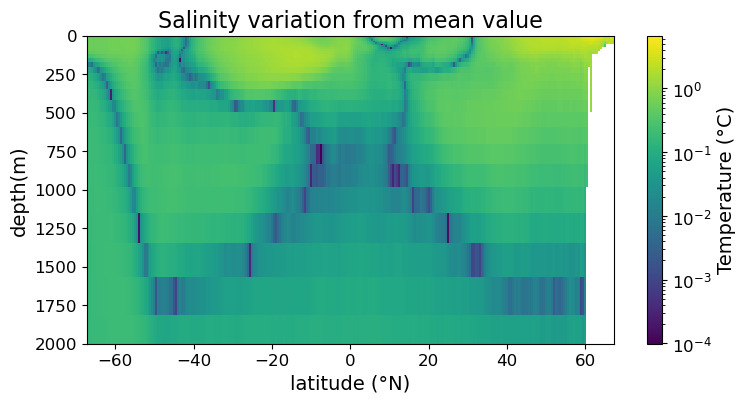

In [78]:
fig = plt.figure(figsize=(8.5, 4))
ax = fig.add_subplot()

#### MODIFICATION STARTS HERE

im = ax.pcolormesh(lat, depths, sal_diff, norm=colors.LogNorm())

#### MODIFICATION ENDS HERE

cb = fig.colorbar(im)

cb.set_label("Salinity", fontsize=14)
cb.ax.tick_params(labelsize=12)

ax.set_xlabel("latitude (°N)", fontsize=14)
ax.set_ylabel("depth (m)", fontsize=14)
ax.set_title("Absolute Salinity variation from mean value", fontsize=16)
ax.tick_params(labelsize=12)

ax.set_ylim(2000, 0)

plt.show(fig)

## Remarks: choice of color map

So far we have been plotting false-color plots using the default color map of matplotlib. This is not the only possible choice. However, recall in the discussion of week 5 that color map choice should take accessibility into account. Helpfully, matplotlib has a page ([https://matplotlib.org/stable/users/explain/colors/colormaps.html](https://matplotlib.org/stable/users/explain/colors/colormaps.html)) that provides good overview of color maps available in matplotlib as well as how they fit into the accessibility concern. Treat this as a *required reading* and choose your color map wisely!

In short, the sequential color maps should be your default choices. If a middle value (e.g., zero, mean of data, etc.) is important, a diverging color map may be justified.

As an example, here is the temperature variation plot using the "inferno" color map:

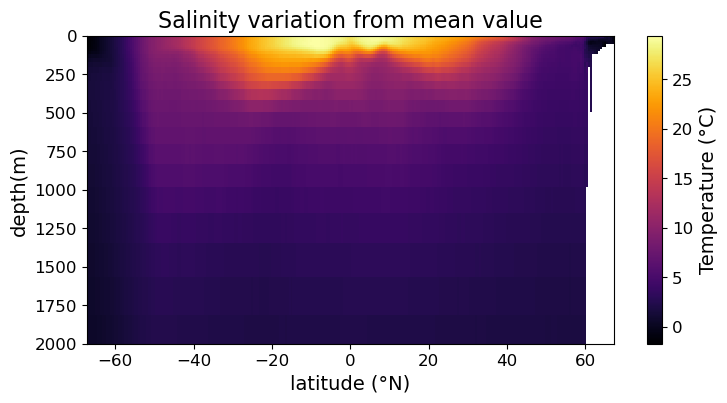

In [105]:
fig = plt.figure(figsize=(8.5, 4))
ax = fig.add_subplot()

#### MODIFICATION STARTS HERE

im = ax.pcolormesh(lat, depths, temp, cmap='inferno')

#### MODIFICATION ENDS HERE

cb = fig.colorbar(im)

cb.set_label("Temperature (°C)", fontsize=14)
cb.ax.tick_params(labelsize=12)

ax.set_xlabel("latitude (°N)", fontsize=14)
ax.set_ylabel("depth (m)", fontsize=14)
ax.set_title("Temperature variation with latitude and depth", fontsize=16)
ax.tick_params(labelsize=12)

ax.set_ylim(2000, 0)

plt.show(fig)

In Addition, the third-party `cmocean` module also provides a number of "good" color maps for oceanographic data. A good documentation of `cmocean` can be found at [https://matplotlib.org/cmocean/](https://matplotlib.org/cmocean/). For illustration, we will re-plot the temperature data using the thermal colormap below:

In [80]:
import cmocean as cmo

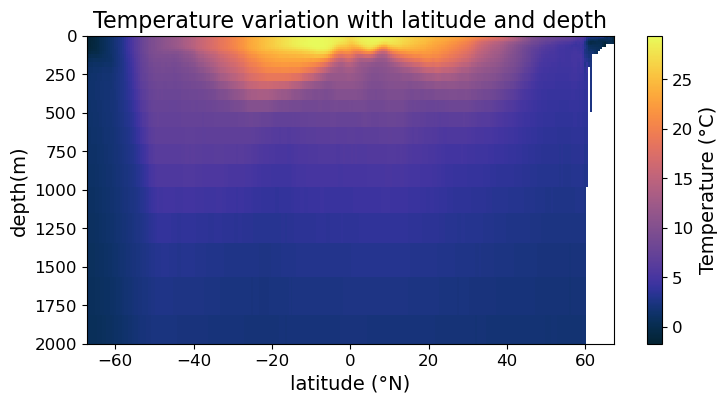

In [82]:
fig = plt.figure(figsize=(8.5, 4))
ax = fig.add_subplot()

#### MODIFICATION STARTS HERE

im = ax.pcolormesh(lat, depths, temp, cmap=cmo.cm.thermal)

#### MODIFICATION ENDS HERE

cb = fig.colorbar(im)
cb.set_label("Temperature (°C)", fontsize=14)
cb.ax.tick_params(labelsize=12)

ax.set_xlabel("latitude (°N)", fontsize=14)
ax.set_ylabel("depth (m)", fontsize=14)
ax.set_title("Temperature variation with latitude and depth", fontsize=16)
ax.tick_params(labelsize=12)

ax.set_ylim(2000, 0)

plt.show(fig)

## Filled Contour plot via `.contourf()`

You may notice that the `.pcolormesh()` plots we produced about are somewhat pixelated. That's because ultimately our underlying data is discrete. If you want a smoother representation of the landscape of your data, consider using filled contour plot produced by `.contourf()` instead. In the simplest way, all we have to do is to replace `.pcolormesh()` with `.contourf()`:

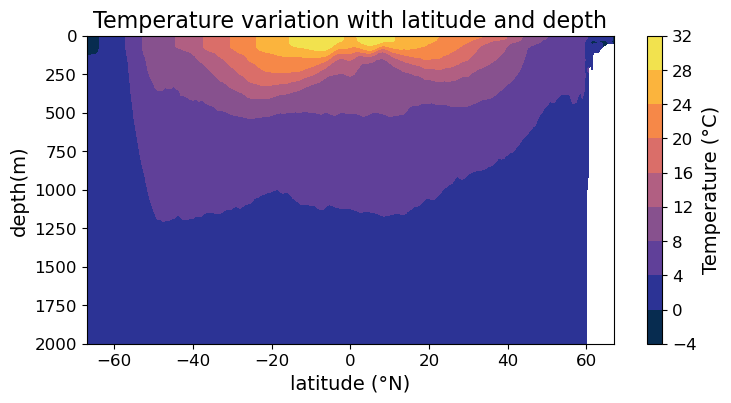

In [86]:
fig = plt.figure(figsize=(8.5, 4))
ax = fig.add_subplot()

#### MODIFICATION STARTS HERE

# Use `.contourf()` instead of `.pcolormesh()`
im = ax.contourf(lat, depths, temp, cmap=cmo.cm.thermal)

#### MODIFICATION EMDS HERE

cb = fig.colorbar(im)

cb.set_label("Temperature (°C)", fontsize=14)
cb.ax.tick_params(labelsize=12)

ax.set_xlabel("latitude (°N)", fontsize=14)
ax.set_ylabel("depth (m)", fontsize=14)
ax.set_title("Temperature variation with latitude and depth", fontsize=16)
ax.tick_params(labelsize=12)

ax.set_ylim(2000, 0)

plt.show(fig)

However, there is one important argument in `.contourf()` that's absent in `.pcolormesh()`. Namely, the `levels` argument that determine where the contour boundaries are. For example, we can request denser contours than the plot above if we set:

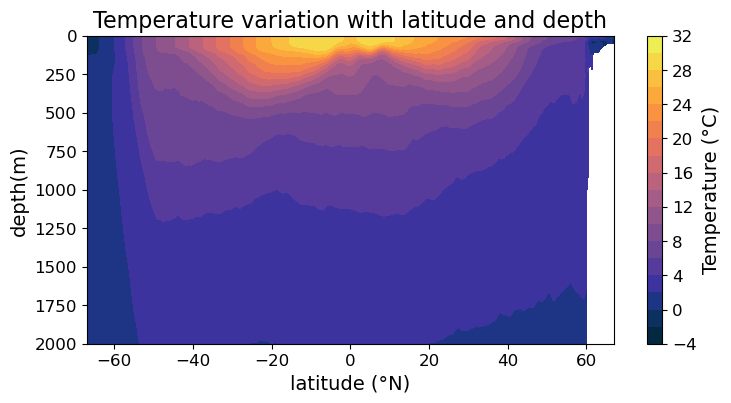

In [88]:
fig = plt.figure(figsize=(8.5, 4))
ax = fig.add_subplot()

#### MODIFICATION STARTS HERE

# Override the automatically chosen contour levels
im = ax.contourf(
    lat, depths, temp, 
    levels = np.arange(-4, 32.5, 2), cmap=cmo.cm.thermal
)

#### MODIFICATION EMDS HERE

cb = fig.colorbar(im)

cb.set_label("Temperature (°C)", fontsize=14)
cb.ax.tick_params(labelsize=12)

ax.set_xlabel("latitude (°N)", fontsize=14)
ax.set_ylabel("depth (m)", fontsize=14)
ax.set_title("Temperature variation with latitude and depth", fontsize=16)
ax.tick_params(labelsize=12)

ax.set_ylim(2000, 0)

plt.show(fig)

We can also use logarithmic color scale in filled contour plot:

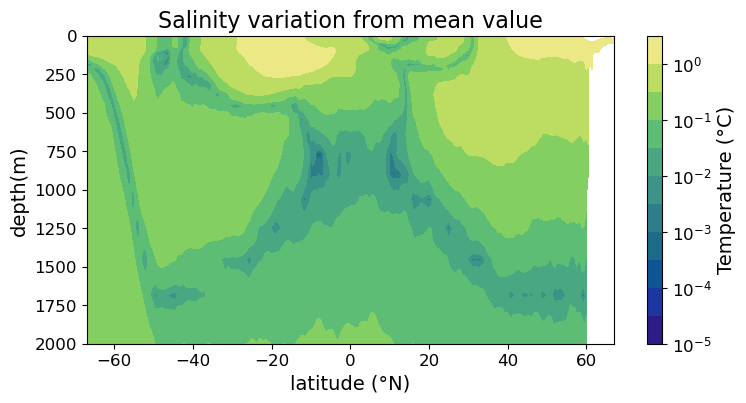

In [91]:
fig = plt.figure(figsize=(8.5, 4))
ax = fig.add_subplot()

#### MODIFICATION STARTS HERE

im = ax.contourf(
    lat, depths, sal_diff, 
    cmap=cmo.cm.haline, norm=colors.LogNorm(), 
    levels = 10**np.arange(-5, 1, 0.5)
)

#### MODIFICATION ENDS HERE

cb = fig.colorbar(im)

cb.set_label("Salinity", fontsize=14)
cb.ax.tick_params(labelsize=12)

ax.set_xlabel("latitude (°N)", fontsize=14)
ax.set_ylabel("depth (m)", fontsize=14)
ax.set_title("Absolute salinity variation from mean value", fontsize=16)
ax.tick_params(labelsize=12)

ax.set_ylim(2000, 0)

plt.show(fig)

## Line contour plot via `.contour()`

Finally, we can also make line contour plot via `.contour()` instead of `.contourf()`. Again, with minimum modifcations our plot now looks like:

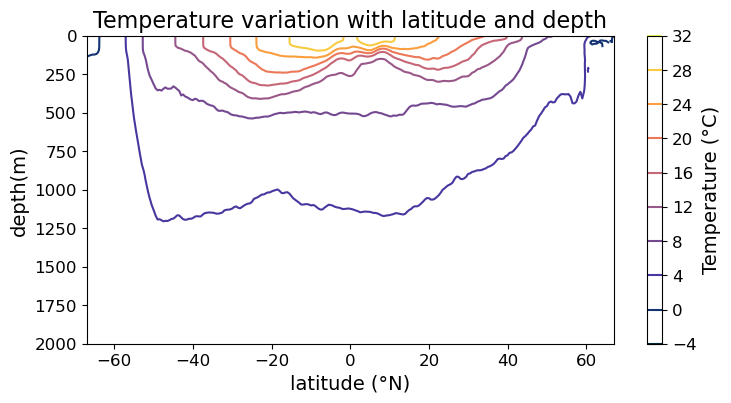

In [96]:
fig = plt.figure(figsize=(8.5, 4))
ax = fig.add_subplot()

#### MODIFICATION STARTS HERE

# Use `.contour()` instead of `.contourf()`
im = ax.contour(lat, depths, temp, cmap=cmo.cm.thermal)

#### MODIFICATION EMDS HERE

cb = fig.colorbar(im)

cb.set_label("Temperature (°C)", fontsize=14)
cb.ax.tick_params(labelsize=12)

ax.set_xlabel("latitude (°N)", fontsize=14)
ax.set_ylabel("depth (m)", fontsize=14)
ax.set_title("Temperature variation with latitude and depth", fontsize=16)
ax.tick_params(labelsize=12)

ax.set_ylim(2000, 0)

plt.show(fig)

In the case of line contour plot, it is no longer easy to read off the values of the contours via the color bar. So we may instead put *labels on the contours* themselves. To do so, we need to use the `.clabel()` method on the contours, e.g.,

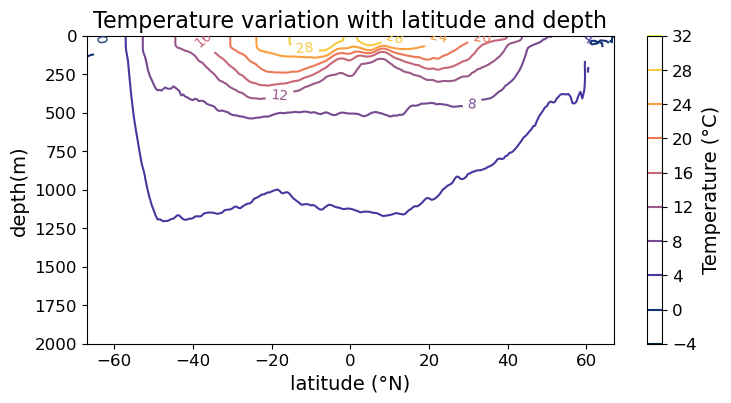

In [100]:
fig = plt.figure(figsize=(8.5, 4))
ax = fig.add_subplot()

im = ax.contour(lat, depths, temp, cmap=cmo.cm.thermal)
cb = fig.colorbar(im)

#### MODIFICATION STARTS HERE

# create labels on the contour lines
cl = im.clabel(fontsize=10)

#### MODIFICATION EMDS HERE

cb.set_label("Temperature (°C)", fontsize=14)
cb.ax.tick_params(labelsize=12)

ax.set_xlabel("latitude (°N)", fontsize=14)
ax.set_ylabel("depth (m)", fontsize=14)
ax.set_title("Temperature variation with latitude and depth", fontsize=16)
ax.tick_params(labelsize=12)

ax.set_ylim(2000, 0)

plt.show(fig)

Finally, the line style of contours can also be adjusted *per contour*:

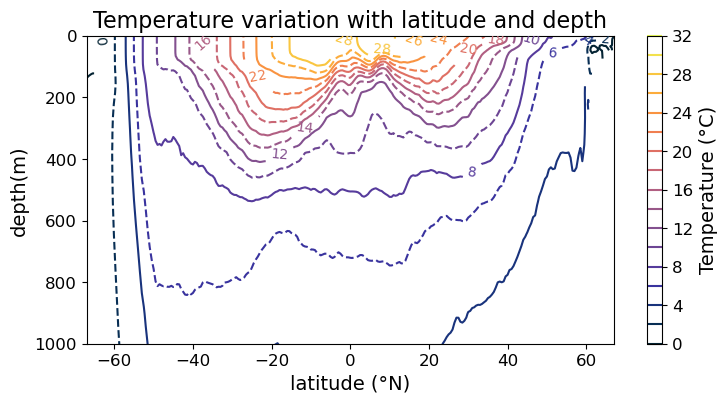

In [104]:
fig = plt.figure(figsize=(8.5, 4))
ax = fig.add_subplot()

#### MODIFICATION STARTS HERE

# cycle between solid and broken line
im = ax.contour(
    lat, depths, temp, 
    cmap=cmo.cm.thermal, 
    levels = np.arange(0, 32.5, 2), 
    linestyles=["-", "--"]
)

#### MODIFICATION EMDS HERE

cb = fig.colorbar(im)
cl = im.clabel(fontsize=10)

cb.set_label("Temperature (°C)", fontsize=14)
cb.ax.tick_params(labelsize=12)

ax.set_xlabel("latitude (°N)", fontsize=14)
ax.set_ylabel("depth (m)", fontsize=14)
ax.set_title("Temperature variation with latitude and depth", fontsize=16)
ax.tick_params(labelsize=12)

ax.set_ylim(1000, 0)

plt.show(fig)